In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [26]:
# Load the dataset
df = pd.read_csv("../train.csv")

In [27]:
df = df.drop(columns=['ID', 'Customer_ID', 'Month', 'Age', 'Name' ,'SSN', 'Occupation', 'Type_of_Loan', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Credit_Utilization_Ratio'])


In [28]:
df = pd.get_dummies(df, columns=['Credit_Score', 'Credit_Mix'])

In [29]:
# Vérifier les doublons dans le DataFrame
duplicates = df.duplicated()
# Compter le nombre total de doublons
total_duplicates = duplicates.sum()

In [30]:
# Trouver toutes les occurrences de doublons dans le DataFrame
all_duplicate_rows = df[df.duplicated(keep=False)]

In [31]:
# Supprimer les doublons du DataFrame
df_cleaned = df.drop_duplicates()

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_columns = ["Annual_Income", "Monthly_Inhand_Salary", 
                   "Num_Bank_Accounts", "Num_Credit_Card", 
                   "Interest_Rate", "Num_of_Loan", 
                   "Delay_from_due_date", "Num_of_Delayed_Payment", 
                   "Outstanding_Debt", "Credit_History_Age", 
                   "Monthly_Balance"]

df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [33]:
from sklearn.model_selection import train_test_split

# Séparer les caractéristiques (X) et la variable cible (y)
X = df.drop(columns=['Credit_Score_Good', 'Credit_Score_Poor', 'Credit_Score_Standard'])
y = df[['Credit_Score_Good', 'Credit_Score_Poor', 'Credit_Score_Standard']]

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Confusion Matrix:
[[2483   56  988]
 [  65 4461 1348]
 [ 959 1339 8301]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.70      0.71      3527
           1       0.76      0.76      0.76      5874
           2       0.78      0.78      0.78     10599

    accuracy                           0.76     20000
   macro avg       0.75      0.75      0.75     20000
weighted avg       0.76      0.76      0.76     20000



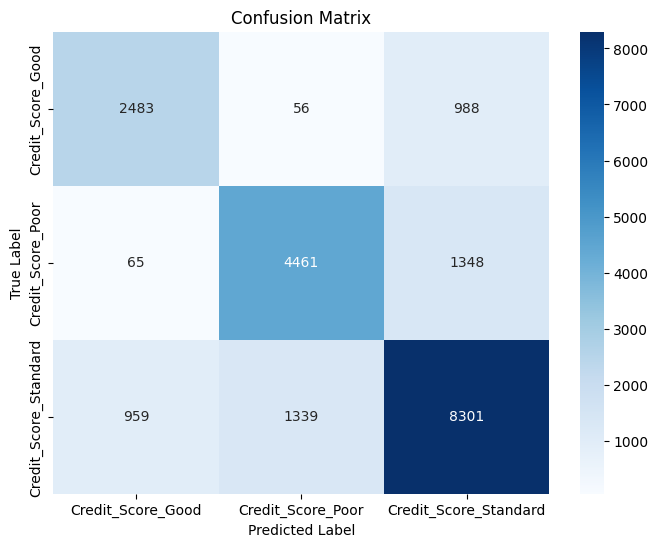

In [35]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Initialize and train the Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test.values.argmax(axis=1), y_pred.argmax(axis=1)))

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


ValueError: multilabel-indicator is not supported

Accuracy: 0.7438442555525089
Precision: 0.7439938175646993
Recall: 0.7438442555525089
F1-score: 0.7439151095097203
Confusion Matrix:
[[ 5797   823  1926]
 [  883 20343  6500]
 [ 1967  6585 28116]]


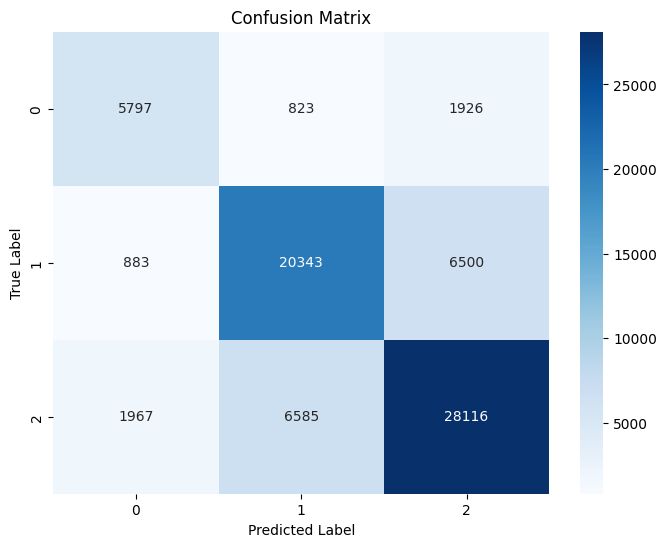

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
